In [1]:
# load and display an image with Matplotlib
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


from matplotlib.widgets import Slider

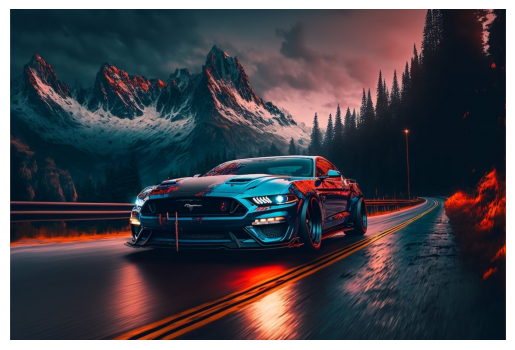

In [2]:
# load image as pixel array
# An image of a file opens
image = mpimg.imread(os.path.join(os.getcwd(), "imagenes", "wallpaper.jpg")) / 255

plt.imshow(image)
plt.axis('off')  # Para desactivar los ejes en la visualización
plt.show()

In [21]:
class Luminancia:
    
    def __init__(self):
        
        pass   

    def rgb_to_yiq(self, img):

        modified_img = np.copy(img)

        heigth, width, channels = modified_img.shape

        for i in range(heigth):
    
            for j in range(width):

                r, g, b = modified_img[i, j]

                change_y = 0.299 * r + 0.587 * g + 0.114 * b
                change_i = 0.595716 * r - 0.274453 * g - 0.321263 * b
                change_q = 0.211456 * r - 0.522591 * g + 0.311135 * b

                modified_img[i, j] = [change_y, change_i + 0.5, change_q + 0.5]  
                
        return modified_img

    def yiq_to_rgb(self, img):

        modified_img = np.copy(img)

        heigth, width, channels = modified_img.shape

        for a in range(heigth):
    
            for b in range(width):
                
                y, i, q = modified_img[a, b]
        
                i -= 0.5
                q -= 0.5
        
                change_r = y + 0.9663 * i + 0.6210 * q
        
                change_g = y - 0.2721 * i - 0.6474 * q
        
                change_b = y - 1.1070 * i + 1.7046 * q        
                
                modified_img[a, b] = [change_r, change_g, change_b]
                
        return modified_img
    
    def search(self, lista, element):
        
        band = False
        
        pos = 0
        
        while not band and pos < len(lista) - 1:
            
            if element >= lista[pos][0] and element < lista[pos][1]:
                
                band = True
            
            else: 
                
                pos += 1
                
        return pos
    
    
    def histogram(self, yimg, n):
        
        heigth, width, channels = yimg.shape
        
        rangos = [(round((1 / n) * x, 2), round((1 / n) * x + (1 / n), 2)) for x in range(0, n)]
        
        contador = [0 for y in range(0, n)]
        
        for i in range(heigth):
    
            for j in range(width):
                
                num = self.search(rangos, yimg[i, j, 0])
                
                contador[num] += 1
        
        intervalos_x = [(i[0] + i[1]) / 2 for i in rangos]
       
        frecuencias_y = contador
        
        plt.figure(figsize=(20, 10))
        
        plt.bar(intervalos_x, frecuencias_y, width=0.04, edgecolor='black')
        plt.xlabel('Intervalos')
        plt.ylabel('Frecuencia')
        plt.title('Histograma de datos')
        plt.grid(True)
        plt.show()
        
        

In [22]:
lum = Luminancia()

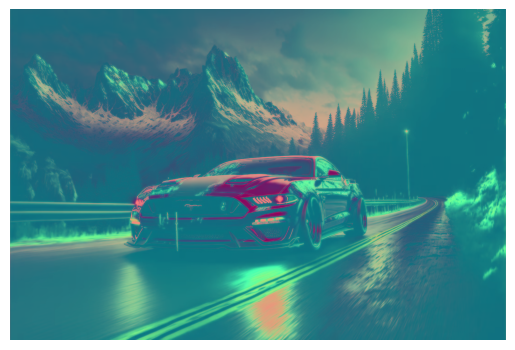

In [23]:
wall_yiq_img = lum.rgb_to_yiq(image)

wall_yiq_img = np.clip(wall_yiq_img, 0, 1)

plt.imshow(wall_yiq_img)
plt.axis("off")
plt.show()

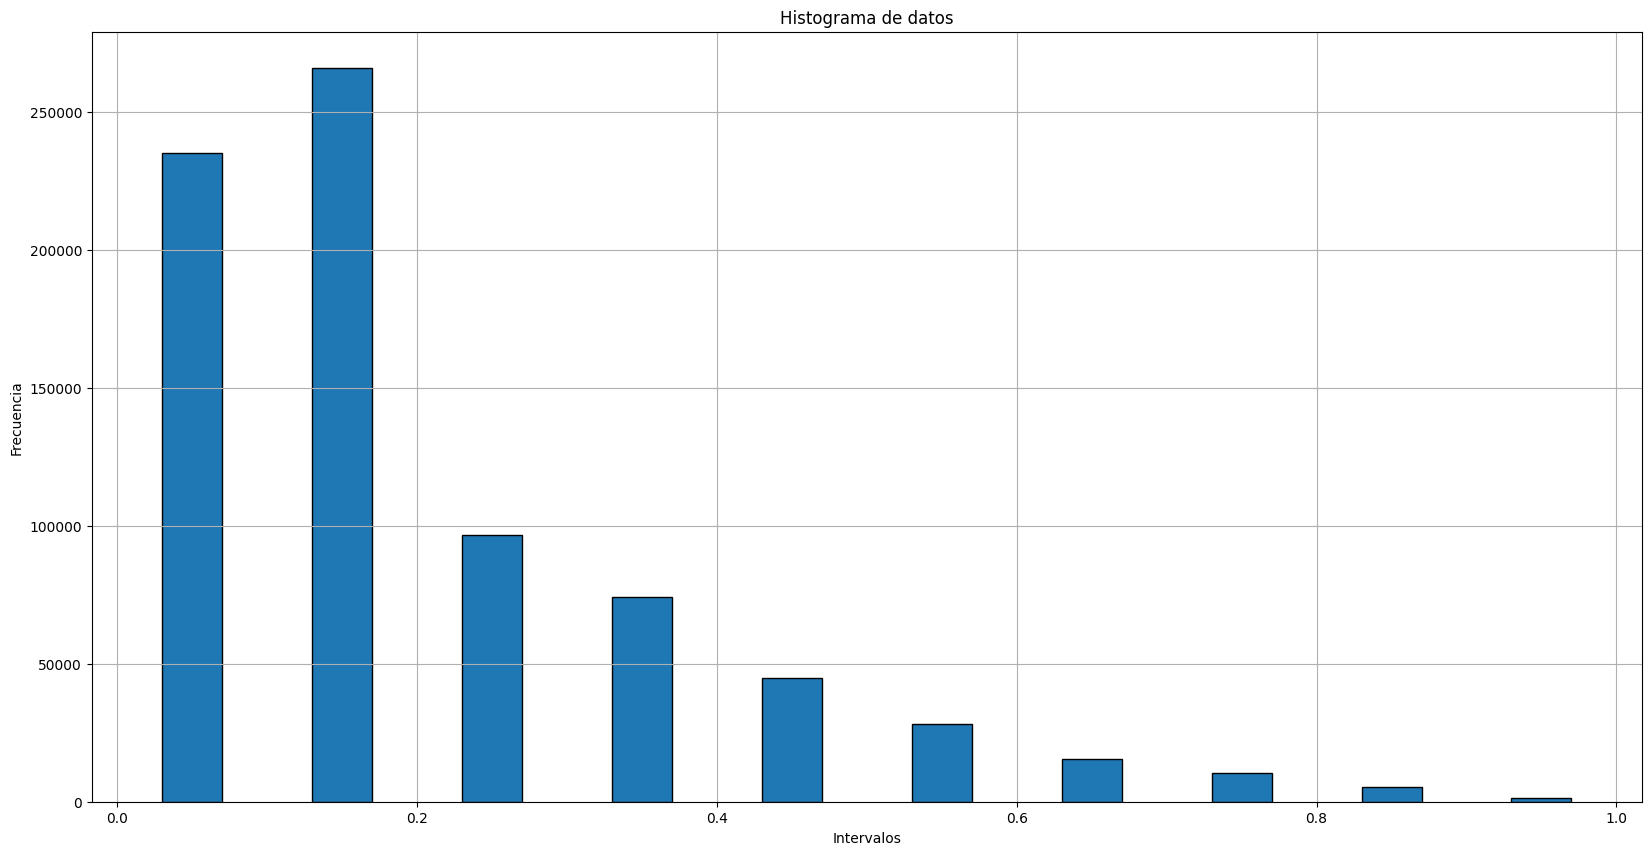

In [25]:
lum.histogram(wall_yiq_img, 10)